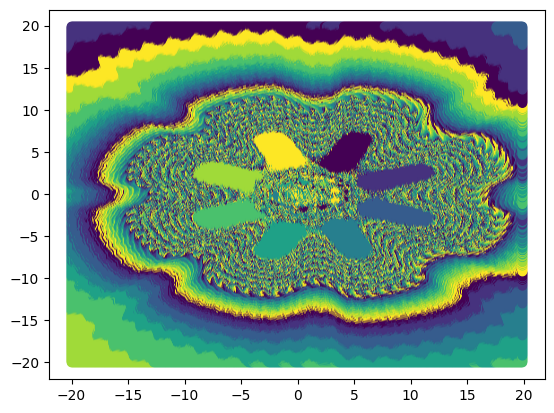

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm

class DynamicalSystem:
    """A specific discrete dynamical system of two variables"""
    # system parameters
    a = 0.7
    b = 0.9998

    # pre-calculated points for the basins of attraction for the system.
    BASINS = np.array([
        [4.69897327,  4.92529175],
        [8.7885769,   2.04630155],
        [8.79063658, -2.04103883],
        [4.70474152, -4.92149458],
        [-1.0541107, -5.12588343],
        [-5.5479663, -2.24855637],
        [-5.55101262, 2.2422881],
        [-1.06228051, 5.12440945],
    ])

    def calc_fs(self):
        """Calculates the value of f for the current x"""
        x_sqr = self.xs ** 2
        return A*self.xs + 2*(1-A)*x_sqr/(1+x_sqr)

    def __init__(self, x_grid, y_grid):
        self.xs = x_grid
        self.ys = y_grid
        self.f = self.calc_fs()

    def tick(self):
        """Performs one evolution step"""
        old_xs = self.xs
        self.xs = self.ys + self.f
        self.f = self.calc_fs()
        self.ys = self.f - B*old_xs

    def evolve(self, steps):
        """Performs <steps> ticks and return the resulting x,y points"""
        for _ in range(steps):
            self.tick()
        return self
    
    def get_basins(self):
        """Calculates the basins of attraction for each point"""
        evolved_pairs = np.column_stack((self.xs, self.ys))[:, None]
        basins = norm(evolved_pairs - self.BASINS, axis=2).argmin(axis=1)
        return basins


def plot_grid_fate(coords_slice, steps=100):
    """Evolve and plot the basins of attraction for an entire grid"""
    x, y = np.mgrid[coords_slice, coords_slice].reshape(2, -1)
    basins = DynamicalSystem(x, y).evolve(steps).get_basins()
    return plt.scatter(x, y, c=basins)


if __name__ == "__main__":
    plot_grid_fate(slice(-20, 20, 0.1), steps=6000);